In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LogNorm 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.preprocessing import LabelEncoder
import glob
import pywt
import datetime
from scipy import signal
from IPython.display import HTML
from termcolor import colored
%matplotlib inline

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import pywt
from scipy import signal
from termcolor import colored
%matplotlib inline
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='../input/korea-corona-case-to-211227/malgun.ttf')
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
loan_result = pd.read_csv('loan_result.csv')
log_data = pd.read_csv('log_data.csv')
user_spec = pd.read_csv('user_spec.csv')

In [4]:
#Marge loan_result and user_spec by application_id
marge = loan_result.merge(user_spec, how='left', on='application_id')

In [5]:
#Check Null Values
def check_null(df):
    for i in list(df.columns):
        if df[i].isnull().sum() == 0:
            print(i, '0')
        else:
            print(i, '>>>Not 000')

In [6]:
check_null(marge)

application_id 0
loanapply_insert_time 0
bank_id 0
product_id 0
loan_limit >>>Not 000
loan_rate >>>Not 000
is_applied >>>Not 000
user_id >>>Not 000
birth_year >>>Not 000
gender >>>Not 000
insert_time >>>Not 000
credit_score >>>Not 000
yearly_income >>>Not 000
income_type >>>Not 000
company_enter_month >>>Not 000
employment_type >>>Not 000
houseown_type >>>Not 000
desired_amount >>>Not 000
purpose >>>Not 000
personal_rehabilitation_yn >>>Not 000
personal_rehabilitation_complete_yn >>>Not 000
existing_loan_cnt >>>Not 000
existing_loan_amt >>>Not 000


In [7]:
#Data pre processing (personal_rehabilitation_yn, gender NaN values replace by 2 and 
#other NaN values replace by 0 and Categorical Data labeled by numerical data)
labelecoder_df = LabelEncoder()
#marge_filter = marge.drop(columns=['insert_time']) #drop company_enter_month
marge_filter = marge.drop(columns=['company_enter_month']) #drop company_enter_month
marge_filter = marge_filter.dropna(subset=['user_id'])

marge_filter['loan_limit'] = marge_filter['loan_limit'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['loan_rate'] = marge_filter['loan_rate'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['birth_year'] = marge_filter['birth_year'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['gender'] = marge_filter['gender'].replace(np.nan, 2) #NaN replaced by 2 ------>
marge_filter['credit_score'] = marge_filter['credit_score'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['yearly_income'] = marge_filter['yearly_income'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['income_type'] = marge_filter['income_type'].replace(np.nan, 'Not_given') #NaN replaced by 'Not_given'
marge_filter['employment_type'] = marge_filter['employment_type'].replace(np.nan, 'Not_given') #NaN replaced by 'Not_given'
marge_filter['houseown_type'] = marge_filter['houseown_type'].replace(np.nan, 'Not_given') #NaN replaced by 'Not_given'
marge_filter['purpose'] = marge_filter['purpose'].replace(np.nan, 'Not_given') #NaN replaced by 'Not_given'
marge_filter['personal_rehabilitation_yn'] = marge_filter['personal_rehabilitation_yn'].replace(np.nan, 2) #NaN replaced by 2  ------>
marge_filter['personal_rehabilitation_complete_yn'] = marge_filter['personal_rehabilitation_complete_yn'].replace(np.nan, 2) #NaN replaced by 0   ------>
marge_filter['existing_loan_cnt'] = marge_filter['existing_loan_cnt'].replace(np.nan, 0) #NaN replaced by 0
marge_filter['existing_loan_amt'] = marge_filter['existing_loan_amt'].replace(np.nan, 0) #NaN replaced by 0

marge_filter['income_type_labeled'] = pd.DataFrame(marge_filter[['income_type']]).apply(LabelEncoder().fit_transform)
marge_filter['employment_type_labeled'] = pd.DataFrame(marge_filter['employment_type']).apply(LabelEncoder().fit_transform)
marge_filter['houseown_type_labeled'] = pd.DataFrame(marge_filter['houseown_type']).apply(LabelEncoder().fit_transform)
marge_filter['purpose_labeled'] = pd.DataFrame(marge_filter['purpose']).apply(LabelEncoder().fit_transform)
marge_filter['user_id'] = marge_filter[['user_id']].astype(int)

marge_filter.columns

Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'user_id', 'birth_year',
       'gender', 'insert_time', 'credit_score', 'yearly_income', 'income_type',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'income_type_labeled',
       'employment_type_labeled', 'houseown_type_labeled', 'purpose_labeled'],
      dtype='object')

In [8]:
marge_filter = marge_filter.sort_values(by=['user_id'])
marge_filter

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,income_type_labeled,employment_type_labeled,houseown_type_labeled,purpose_labeled
4755075,248576,2022-05-21 23:41:09,38,134,16000000.0,7.5,0.0,9,1996.0,1.0,...,15000000.0,사업자금,0.0,2.0,1.0,0.0,0,0,0,10
4755088,248576,2022-05-21 23:41:10,1,61,28000000.0,12.4,0.0,9,1996.0,1.0,...,15000000.0,사업자금,0.0,2.0,1.0,0.0,0,0,0,10
4755086,248576,2022-05-21 23:41:10,55,25,16000000.0,14.5,0.0,9,1996.0,1.0,...,15000000.0,사업자금,0.0,2.0,1.0,0.0,0,0,0,10
4755085,248576,2022-05-21 23:41:11,21,196,5000000.0,9.5,0.0,9,1996.0,1.0,...,15000000.0,사업자금,0.0,2.0,1.0,0.0,0,0,0,10
4755084,248576,2022-05-21 23:41:15,47,138,37000000.0,13.1,0.0,9,1996.0,1.0,...,15000000.0,사업자금,0.0,2.0,1.0,0.0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706998,1543548,2022-05-10 20:40:53,35,29,5000000.0,10.6,0.0,879697,1962.0,1.0,...,200000000.0,주택구입,0.0,2.0,0.0,0.0,0,0,2,14
6706997,1543548,2022-05-10 20:40:55,63,226,70000000.0,6.4,0.0,879697,1962.0,1.0,...,200000000.0,주택구입,0.0,2.0,0.0,0.0,0,0,2,14
6707016,1543548,2022-05-10 20:40:53,13,262,100000000.0,13.8,0.0,879697,1962.0,1.0,...,200000000.0,주택구입,0.0,2.0,0.0,0.0,0,0,2,14
6706995,1543548,2022-05-10 20:40:54,33,110,36000000.0,12.1,0.0,879697,1962.0,1.0,...,200000000.0,주택구입,0.0,2.0,0.0,0.0,0,0,2,14


# Log data processing

In [ ]:
#Event login count
user_id = []
login_count = []
events = []

for i1 in np.unique(log_data['user_id']):
    out = log_data[(log_data['user_id']==i1)][['user_id', 'event']].reset_index()
    user_id.append(out['user_id'][0])
    login_count.append(out['user_id'].count().tolist())
    events.append(pd.DataFrame(pd.DataFrame(out['event'].value_counts()).T))

In [ ]:
#add all count together
out = events[0]
for i in events:
    out = pd.concat([out, i])

In [ ]:
user_id = pd.DataFrame(user_id, columns=['user_id']).reset_index(drop=True)
login_count = pd.DataFrame(login_count, columns=['login_count']).reset_index(drop=True)
out = out[1:].reset_index(drop=True)

In [ ]:
out_f = pd.concat([user_id, login_count, out], axis=1)
out_f = out_f.replace(np.nan, 0).astype(int)
out_f.to_csv('out_log_data.csv', index=False)

In [10]:
#Log data processing output
out_log_data = pd.read_csv('out_log_data.csv')
out_log_data

,user_id,login_count,GetCreditInfo,UseLoanManage,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc
0,1,5,3,1,1,0,0,0,0,0,0,0,0
1,7,1,1,0,0,0,0,0,0,0,0,0,0
2,9,3,3,0,0,0,0,0,0,0,0,0,0
3,11,43,8,9,0,7,5,5,4,4,1,0,0
4,12,120,5,1,15,39,15,15,15,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584631,879693,61,2,5,0,12,9,10,17,6,0,0,0
584632,879694,6,0,0,0,3,0,1,1,1,0,0,0
584633,879695,4,0,0,0,1,0,1,1,1,0,0,0
584634,879696,11,3,2,2,1,1,1,0,1,0,0,0


In [11]:
#Marge loan_result and user_spec with log_data by user_id
full_marge =  pd.merge(marge_filter, out_log_data, on="user_id")
full_marge

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,UseLoanManage,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc
0,248576,2022-05-21 23:41:09,38,134,16000000.0,7.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,248576,2022-05-21 23:41:10,1,61,28000000.0,12.4,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,248576,2022-05-21 23:41:10,55,25,16000000.0,14.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,248576,2022-05-21 23:41:11,21,196,5000000.0,9.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,248576,2022-05-21 23:41:15,47,138,37000000.0,13.1,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039194,2149910,2022-03-14 05:23:49,49,136,9000000.0,6.5,1.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039195,1856758,2022-03-14 05:40:38,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039196,2149910,2022-03-14 05:23:30,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039197,1856758,2022-03-14 05:40:56,49,136,9000000.0,6.5,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0


In [12]:
#converting to dat time format
full_marge['loanapply_insert_time'] = pd.to_datetime(full_marge['loanapply_insert_time']).dt.date
full_marge

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,UseLoanManage,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc
0,248576,2022-05-21,38,134,16000000.0,7.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,248576,2022-05-21,1,61,28000000.0,12.4,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,248576,2022-05-21,55,25,16000000.0,14.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,248576,2022-05-21,21,196,5000000.0,9.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,248576,2022-05-21,47,138,37000000.0,13.1,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039194,2149910,2022-03-14,49,136,9000000.0,6.5,1.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039195,1856758,2022-03-14,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039196,2149910,2022-03-14,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0
13039197,1856758,2022-03-14,49,136,9000000.0,6.5,0.0,879696,1997.0,1.0,...,2,2,1,1,1,0,1,0,0,0


In [13]:
#Filter By Date
df_2022_06 = full_marge[full_marge['insert_time'] >= "2022-05-30"]
print('df_2022_06: ',len(df_2022_06))
df_2022_05 = full_marge[full_marge['insert_time'] <= "2022-05-30"]
print('df_2022_05: ',len(df_2022_05))
print('Total: ',len(full_marge))

df_2022_06:  3411059
df_2022_05:  9628140
Total:  13039199


In [14]:
clmn = ['application_id', 'product_id', 'loanapply_insert_time', 'bank_id',
       'loan_limit', 'loan_rate', 'user_id', 'birth_year',
       'gender', 'insert_time', 'credit_score', 'yearly_income', 'income_type',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'income_type_labeled',
       'employment_type_labeled', 'houseown_type_labeled', 'purpose_labeled',
       'login_count', 'GetCreditInfo', 'UseLoanManage', 'Login',
       'EndLoanApply', 'OpenApp', 'ViewLoanApplyIntro', 'StartLoanApply',
       'CompleteIDCertification', 'UsePrepayCalc', 'SignUp', 'UseDSRCalc']

In [ ]:
#Save data for marge with 데이터분석분야_퓨처스부문_평가데이터
df_2022_06[clmn].to_csv('df_2022_06.csv', index=False)

# Unsupervised K-Means

In [16]:
col_for_k_means = ['bank_id', 'product_id', 'loan_limit', 'loan_rate', 'birth_year',
       'gender', 'credit_score', 'yearly_income', 'income_type_labeled',
       'employment_type_labeled', 'houseown_type_labeled', 'purpose_labeled',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','login_count','GetCreditInfo', 'UseLoanManage', 'Login',
       'EndLoanApply', 'OpenApp', 'ViewLoanApplyIntro', 'StartLoanApply',
       'CompleteIDCertification', 'UsePrepayCalc', 'SignUp', 'UseDSRCalc']

In [17]:
df_2022_05[col_for_k_means]

,bank_id,product_id,loan_limit,loan_rate,birth_year,gender,credit_score,yearly_income,income_type_labeled,employment_type_labeled,...,UseLoanManage,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc
0,38,134,16000000.0,7.5,1996.0,1.0,810.0,29000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,61,28000000.0,12.4,1996.0,1.0,810.0,29000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55,25,16000000.0,14.5,1996.0,1.0,810.0,29000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,196,5000000.0,9.5,1996.0,1.0,810.0,29000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,138,37000000.0,13.1,1996.0,1.0,810.0,29000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039194,49,136,9000000.0,6.5,1997.0,1.0,610.0,37000000.0,0,3,...,2,2,1,1,1,0,1,0,0,0
13039195,59,150,18000000.0,15.0,1997.0,1.0,610.0,37000000.0,0,3,...,2,2,1,1,1,0,1,0,0,0
13039196,59,150,18000000.0,15.0,1997.0,1.0,610.0,37000000.0,0,3,...,2,2,1,1,1,0,1,0,0,0
13039197,49,136,9000000.0,6.5,1997.0,1.0,610.0,37000000.0,0,3,...,2,2,1,1,1,0,1,0,0,0


In [18]:
from sklearn.cluster import KMeans, k_means
# Running K means with multible Ks

no_of_clusters = range(1,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(df_2022_05[col_for_k_means])
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 7.235037848462157e+23
The innertia for : 2 Clusters is: 3.74836678168705e+23
The innertia for : 3 Clusters is: 2.8064972939668827e+23
The innertia for : 4 Clusters is: 2.158648096199269e+23
The innertia for : 5 Clusters is: 1.6262894683786628e+23
The innertia for : 6 Clusters is: 1.2886787939371386e+23
The innertia for : 7 Clusters is: 1.125197824889924e+23
The innertia for : 8 Clusters is: 9.983338296692113e+22
The innertia for : 9 Clusters is: 9.037460843213693e+22
The innertia for : 10 Clusters is: 7.978361651869882e+22
The innertia for : 11 Clusters is: 7.158539338620627e+22
The innertia for : 12 Clusters is: 6.39110825948701e+22
The innertia for : 13 Clusters is: 5.8421132905361925e+22
The innertia for : 14 Clusters is: 5.367978248553086e+22
The innertia for : 15 Clusters is: 5.062345657232788e+22
The innertia for : 16 Clusters is: 4.612400741432944e+22
The innertia for : 17 Clusters is: 4.397241585194128e+22
The innertia for : 18 Clusters is: 4.1

Text(0.5, 1.0, 'Inertia Plot per k')

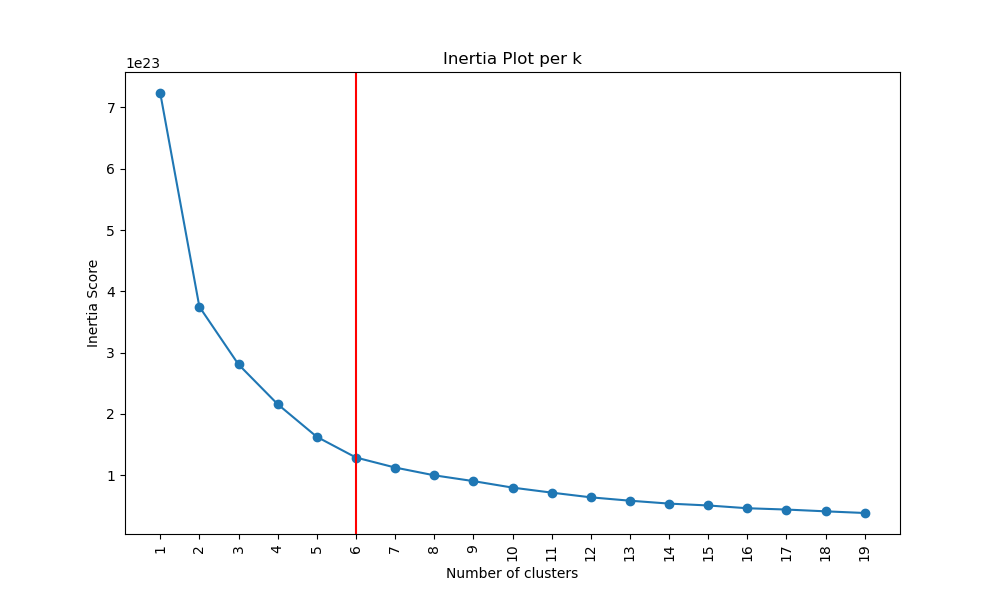

In [19]:
# Cluster Plot
fig, (ax1) = plt.subplots(1, figsize=(10,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia, marker = 'o')
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.axvline(5, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [23]:
from sklearn.cluster import KMeans, k_means
kms = KMeans(n_clusters=6, random_state=1).fit(df_2022_05[col_for_k_means])
col_for_k_means = kms.labels_

In [25]:
# Add Cluster With Dataset
df_2022_05['Cluster'] = kms.labels_
df_2022_05

C:\Users\Lisa\AppData\Local\Temp\ipykernel_17120\3643591360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_05['Cluster'] = kms.labels_


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc,Cluster
0,248576,2022-05-21,38,134,16000000.0,7.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,248576,2022-05-21,1,61,28000000.0,12.4,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,248576,2022-05-21,55,25,16000000.0,14.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,248576,2022-05-21,21,196,5000000.0,9.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,248576,2022-05-21,47,138,37000000.0,13.1,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039194,2149910,2022-03-14,49,136,9000000.0,6.5,1.0,879696,1997.0,1.0,...,2,1,1,1,0,1,0,0,0,0
13039195,1856758,2022-03-14,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,1,1,1,0,1,0,0,0,0
13039196,2149910,2022-03-14,59,150,18000000.0,15.0,0.0,879696,1997.0,1.0,...,2,1,1,1,0,1,0,0,0,0
13039197,1856758,2022-03-14,49,136,9000000.0,6.5,0.0,879696,1997.0,1.0,...,2,1,1,1,0,1,0,0,0,0


In [27]:
#Filterout Caluster
Cluster_6 = df_2022_05[df_2022_05['Cluster']==5]
Cluster_5 = df_2022_05[df_2022_05['Cluster']==4]
Cluster_4 = df_2022_05[df_2022_05['Cluster']==3]
Cluster_3 = df_2022_05[df_2022_05['Cluster']==2]
Cluster_2 = df_2022_05[df_2022_05['Cluster']==1]
Cluster_1 = df_2022_05[df_2022_05['Cluster']==0]

In [28]:
#Filterout applied and not applied
def applied_or_not(df):
    not_applied = df[df['is_applied']==0.0]
    applied = df[df['is_applied']==1.0]
    return not_applied, applied

In [29]:
#Filterout applied and not applied by cluster
Cluster_1_not_applied, Cluster_1_applied = applied_or_not(Cluster_1)
Cluster_2_not_applied, Cluster_2_applied = applied_or_not(Cluster_2)
Cluster_3_not_applied, Cluster_3_applied = applied_or_not(Cluster_3)
Cluster_4_not_applied, Cluster_4_applied = applied_or_not(Cluster_4)
Cluster_5_not_applied, Cluster_5_applied = applied_or_not(Cluster_5)
Cluster_6_not_applied, Cluster_6_applied = applied_or_not(Cluster_6)

In [30]:
#Count applied and not applied application
print('Cluster_1_Total_Applied: ', len(Cluster_1_applied))
print('Cluster_Total_2_Applied: ', len(Cluster_2_applied))
print('Cluster_Total_3_Applied: ', len(Cluster_3_applied))
print('Cluster_Total_4_Applied: ', len(Cluster_4_applied))
print('Cluster_Total_5_Applied: ', len(Cluster_5_applied))
print('Cluster_Total_6_Applied: ', len(Cluster_6_applied))
print('----------------------------')
print('Total_Data_Cluster_1: ', len(Cluster_1))
print('Total_Data_Cluster_2: ', len(Cluster_2))
print('Total_Data_Cluster_3: ', len(Cluster_3))
print('Total_Data_Cluster_4: ', len(Cluster_4))
print('Total_Data_Cluster_5: ', len(Cluster_5))
print('Total_Data_Cluster_6: ', len(Cluster_6))

Cluster_1_Total_Applied:  484980
Cluster_Total_2_Applied:  100
Cluster_Total_3_Applied:  210
Cluster_Total_4_Applied:  215
Cluster_Total_5_Applied:  49295
Cluster_Total_6_Applied:  1169
----------------------------
Total_Data_Cluster_1:  8488884
Total_Data_Cluster_2:  3102
Total_Data_Cluster_3:  7647
Total_Data_Cluster_4:  3159
Total_Data_Cluster_5:  1022823
Total_Data_Cluster_6:  102525


In [31]:
#Less applied cluster applied application id replace as not applied
Cluster_2['is_applied'] = Cluster_2['is_applied'].replace(1, 0)
Cluster_3['is_applied'] = Cluster_3['is_applied'].replace(1, 0)
Cluster_4['is_applied'] = Cluster_4['is_applied'].replace(1, 0)
Cluster_6['is_applied'] = Cluster_6['is_applied'].replace(1, 0)

C:\Users\Lisa\AppData\Local\Temp\ipykernel_17120\3441497944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_2['is_applied'] = Cluster_2['is_applied'].replace(1, 0)
C:\Users\Lisa\AppData\Local\Temp\ipykernel_17120\3441497944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_3['is_applied'] = Cluster_3['is_applied'].replace(1, 0)
C:\Users\Lisa\AppData\Local\Temp\ipykernel_17120\3441497944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [32]:
#All cluster get together
all_cluster = pd.concat([Cluster_1, Cluster_2, Cluster_3, Cluster_4, Cluster_5, Cluster_6])
all_cluster

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,Login,EndLoanApply,OpenApp,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,UsePrepayCalc,SignUp,UseDSRCalc,Cluster
0,248576,2022-05-21,38,134,16000000.0,7.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,248576,2022-05-21,1,61,28000000.0,12.4,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,248576,2022-05-21,55,25,16000000.0,14.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,248576,2022-05-21,21,196,5000000.0,9.5,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,248576,2022-05-21,47,138,37000000.0,13.1,0.0,9,1996.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13016388,537802,2022-03-22,59,150,46000000.0,13.4,0.0,878300,1989.0,1.0,...,0,0,0,0,0,0,0,0,0,5
13016389,537802,2022-03-22,38,16,50000000.0,9.3,0.0,878300,1989.0,1.0,...,0,0,0,0,0,0,0,0,0,5
13016390,537802,2022-03-22,38,223,50000000.0,9.3,0.0,878300,1989.0,1.0,...,0,0,0,0,0,0,0,0,0,5
13016391,537802,2022-03-22,44,140,3000000.0,12.4,0.0,878300,1989.0,1.0,...,0,0,0,0,0,0,0,0,0,5


In [42]:
#Filterout applied and not applied from full dataset
all_cluster_applied = all_cluster[all_cluster['is_applied']==1]
all_cluster_not_applied = all_cluster[all_cluster['is_applied']==0]

In [45]:
#Feature selecting
col_for_cluster = ['bank_id', 'product_id', 'loan_limit', 'loan_rate', 'birth_year',
       'gender', 'credit_score', 'yearly_income', 'income_type_labeled',
       'employment_type_labeled', 'houseown_type_labeled', 'purpose_labeled',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'GetCreditInfo', 'UseLoanManage', 'Login',
       'EndLoanApply', 'OpenApp', 'ViewLoanApplyIntro', 'StartLoanApply',
       'CompleteIDCertification', 'UsePrepayCalc', 'SignUp', 'UseDSRCalc',
       'is_applied']

In [46]:
#Shufling applied application
all_cluster_applied = all_cluster_applied.sample(frac=1).reset_index()
all_cluster_applied = all_cluster_applied[col_for_cluster]

In [47]:
#Shufling not applied application
all_cluster_not_applied = all_cluster_not_applied.sample(frac=1).reset_index()
all_cluster_not_applied = all_cluster_not_applied[col_for_cluster]

In [54]:
#For training data selecting
from sklearn.model_selection import train_test_split
X_train_rest, X_train_not_applied = train_test_split(all_cluster_not_applied, test_size=0.07, random_state=42, shuffle=True)
X_train_not_applied1_rest, X_train_not_applied1 = train_test_split(X_train_rest, test_size=0.072, random_state=42, shuffle=True)
X_train_not_applied2_rest, X_train_not_applied2 = train_test_split(X_train_not_applied1_rest, test_size=0.075, random_state=42, shuffle=True)

In [55]:
#All applied and not applied application
train_1 = pd.concat([X_train_not_applied, all_cluster_applied])
train_2 = pd.concat([X_train_not_applied1, all_cluster_applied])
train_3 = pd.concat([X_train_not_applied2, all_cluster_applied])

In [56]:
#Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_1_scaler = scaler.fit_transform(train_1)
train_2_scaler = scaler.fit_transform(train_2)
train_3_scaler = scaler.fit_transform(train_3)
print('train_1_scaler shape: ', train_1_scaler.shape)
print('train_2_scaler shape: ', train_2_scaler.shape)
print('train_3_scaler shape: ', train_3_scaler.shape)

train_1_scaler shape:  (1170842, 29)
train_2_scaler shape:  (1143197, 29)
train_3_scaler shape:  (1122899, 29)


In [57]:
#Input and output selecting
train_x_1 = np.array(train_1_scaler[:, :28])
train_y_1 = np.array(train_1_scaler[:, 28])

train_x_2 = np.array(train_2_scaler[:, :28])
train_y_2 = np.array(train_2_scaler[:, 28])

train_x_3 = np.array(train_3_scaler[:, :28])
train_y_3 = np.array(train_3_scaler[:, 28])

In [58]:
#Deep learning data saving
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train_x_1, train_y_1, test_size=0.05, random_state=42, shuffle=True)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_x_2, train_y_2, test_size=0.05, random_state=42, shuffle=True)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(train_x_3, train_y_3, test_size=0.05, random_state=42, shuffle=True)

In [59]:
pd.DataFrame(X_train_1).to_csv('X_train_1.csv', index=False)
pd.DataFrame(y_train_1).to_csv('y_train_1.csv', index=False)
pd.DataFrame(X_test_1).to_csv('X_test_1.csv', index=False)
pd.DataFrame(y_test_1).to_csv('y_test_1.csv', index=False)

pd.DataFrame(X_train_2).to_csv('X_train_2.csv', index=False)
pd.DataFrame(y_train_2).to_csv('y_train_2.csv', index=False)
pd.DataFrame(X_test_2).to_csv('X_test_2.csv', index=False)
pd.DataFrame(y_test_2).to_csv('y_test_2.csv', index=False)

pd.DataFrame(X_train_3).to_csv('X_train_3.csv', index=False)
pd.DataFrame(y_train_3).to_csv('y_train_3.csv', index=False)
pd.DataFrame(X_test_3).to_csv('X_test_3.csv', index=False)
pd.DataFrame(y_test_3).to_csv('y_test_3.csv', index=False)